## Criminal & Terrorist Networks Analysis

In [ ]:
!pip install cdlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
from collections import Counter
import numpy as np
warnings.filterwarnings('ignore')

In [ ]:
import networkx as nx

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import networkx as nx
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import cdlib

In [ ]:
G_T = nx.read_edgelist('TERROR NET DATA.txt',create_using=nx.Graph())
G_C = nx.read_edgelist('CRIMINAL NET DATA.txt',create_using=nx.Graph())

In [ ]:
print(nx.info(G_C))
print(nx.info(G_T))

Graph with 2749 nodes and 2952 edges
Graph with 4275 nodes and 6531 edges


In [ ]:
df_grados_G_C = pd.DataFrame(G_C.degree)
print(df_grados_G_C)
fig = px.histogram(df_grados_G_C, x= 1)
fig.show()

          0  1
0     T2664  5
1     T2731  1
2     T2732  1
3      T540  1
4      T408  1
...     ... ..
2744   T379  1
2745  T1120  1
2746  T2233  1
2747   T208  1
2748   T265  1

[2749 rows x 2 columns]


In [ ]:
aux = nx.clustering(nx.Graph(G_C)) #calcular el coeficiente de clustering sobre el G_C convertido en no dirigido
df_clustering_G_C = pd.DataFrame(aux.values())
fig = px.histogram(df_clustering_G_C,x=0)
fig.show()

In [ ]:
df_grados_G_T = pd.DataFrame(G_T.degree)
print(df_grados_G_T)
fig = px.histogram(df_grados_G_T, x= 1)
fig.show()

          0   1
0      P325  10
1      P358   6
2      P283  15
3      P360   9
4       P18  10
...     ...  ..
4270  P4428   1
4271  P4432   1
4272  P4593   1
4273  P4464   1
4274  P4582   1

[4275 rows x 2 columns]


In [ ]:
aux = nx.clustering(nx.Graph(G_T)) #calcular el coeficiente de clustering sobre el G_T convertido en no dirigido
df_clustering_G_T = pd.DataFrame(aux.values())
fig = px.histogram(df_clustering_G_T,x=0)
fig.show()

<a id="model"></a>
### Community Discovery algorithm(s) selection and configuration)

After having defined the graph, we can select the algorithm(s) to partition it.

In [ ]:
from cdlib import algorithms

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'leidenalg', 'graph_tool', 'karateclub', 'wurlitzer'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'infomap', 'leidenalg', 'wurlitzer'}


In [ ]:
lp_coms_G_C = algorithms.label_propagation(G_C)
lp_coms_G_T = algorithms.label_propagation(G_T)

In [ ]:
from cdlib.algorithms.crisp_partition import louvain
louvain_coms_G_C = algorithms.louvain(G_C)
louvain_coms_G_T = algorithms.louvain(G_T)

All Community Discovery algorithms generate as result an object that implements a concrete instance of the ``Clustering`` datatype.

In particular, both Louvain and Label Propagation returns a ``NodeClustering`` object having the following propterties:

In [ ]:
print(louvain_coms_G_C.method_name)
print(louvain_coms_G_T.method_name) #nombre del algoritmo de deteccion de comunidades que se ha utilizado

Louvain
Louvain


In [ ]:
print(louvain_coms_G_C.method_parameters) #obtener los parametros del algoritmo utilizado para obtener las comunidades
print(louvain_coms_G_T.method_parameters)

{'weight': 'weight', 'resolution': 1.0, 'randomize': None}
{'weight': 'weight', 'resolution': 1.0, 'randomize': None}


Moreover, ``Clustering`` object allow also for the generation of a JSON representation of the results

In [ ]:
print(louvain_coms_G_C.to_json())
print(louvain_coms_G_T.to_json())

{"communities": [["T1955", "T679", "T1482", "T23", "T1882", "T2460", "T37", "T1036", "T1079", "T1242", "T1363", "T44", "T1499", "T1789", "T1814", "T1992", "T2010", "T2109", "T2226", "T2273", "T2324", "T1878", "T2458", "T1862", "T89", "T1156", "T2327", "T2333", "T2339", "T2390", "T2414", "T2434", "T2439", "T2517", "T2577", "T2579", "T2607", "T55", "T56", "T1589", "T1849", "T1743", "T184", "T236", "T990", "T1864", "T355", "T1448", "T444", "T2575", "T543", "T570", "T1984", "T572", "T641", "T678", "T2319", "T734", "T783", "T789", "T966", "T1062", "T1140", "T43", "T1287", "T1331", "T1330", "T2621", "T1465", "T2069", "T1566", "T1601", "T1662", "T1681", "T2740", "T2724", "T2582", "T1911", "T1853", "T1942", "T1946", "T1961", "T2217", "T2004", "T2013", "T2741", "T2315", "T2343", "T2363", "T2404", "T2466", "T2477", "T2598", "T2568", "T2576", "T2580", "T1217", "T2587", "T2040", "T2672", "T2713", "T2701", "T2702", "T2703", "T2691", "T2019", "T970", "T1430", "T1971", "T2", "T1684", "T1011", "T1484"

<a id="fitness"></a>
### Clustering Evaluation (Fitness functions)

After having obtained a network clustering we can compute several indexes upon it.

For a same index it is possible to obtain a synthetic representation of its min/max/mean/std values

In [ ]:
print(louvain_coms_G_C.average_internal_degree(),'\n')

print(louvain_coms_G_T.average_internal_degree())

FitnessResult(min=1.0, max=3.015625, score=1.1810284275562508, std=0.3028441336221125) 

FitnessResult(min=1.0, max=4.225130890052356, score=2.0890712523972454, std=0.7186433375371901)


as well as its communitiy-wise value

In [ ]:
print(louvain_coms_G_C.average_internal_degree(summary=False))
print(louvain_coms_G_T.average_internal_degree(summary=False))

[3.015625, 2.243137254901961, 2.533333333333333, 2.9148936170212765, 2.7007299270072993, 2.0444444444444443, 1.9775280898876404, 1.9545454545454546, 1.935483870967742, 1.9230769230769231, 2.0, 2.0869565217391304, 2.0, 1.8823529411764706, 1.8571428571428572, 1.8461538461538463, 1.8461538461538463, 1.8333333333333333, 1.8333333333333333, 1.8181818181818181, 2.0, 1.8, 2.0, 1.8, 1.8, 1.75, 1.75, 1.7142857142857142, 1.7142857142857142, 1.7142857142857142, 1.7142857142857142, 1.7142857142857142, 1.7142857142857142, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6, 1.6, 2.0, 1.6, 1.6, 1.6, 1.6, 1.6, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 

Fitness scores can also be instantiated at library level

In [ ]:
from cdlib import evaluation

print(evaluation.average_internal_degree(G_C,louvain_coms_G_C))
print(evaluation.average_internal_degree(G_T,louvain_coms_G_T))


FitnessResult(min=1.0, max=3.015625, score=1.1810284275562508, std=0.3028441336221125)
FitnessResult(min=1.0, max=4.225130890052356, score=2.0890712523972454, std=0.7186433375371901)


<a id="comparison"></a>
### Clustering Evaluation (Comparison)

When multiple clustering have been computed on a same network it is useful to measure their resemblance.

``CDlib`` allows to do so by exposing several clustering resemblance scores, each one of them tailored to support specific kind of network clusterings (crisp/partition, complete/partial node coverage).

As for the fitness functions, resemblance scores can be instantiated at the community level as well as at the library level.

In [ ]:
print(louvain_coms_G_C.normalized_mutual_information(lp_coms_G_C)) #mide el porcentaje de parecido con informacion mutua entre 2 metodos de CD
print(louvain_coms_G_T.normalized_mutual_information(lp_coms_G_T))

MatchingResult(score=0.8830994181116283, std=None)
MatchingResult(score=0.7290827685376337, std=None)


In [ ]:
print(evaluation.normalized_mutual_information(louvain_coms_G_C,lp_coms_G_C))
print(evaluation.normalized_mutual_information(louvain_coms_G_T,lp_coms_G_T))

MatchingResult(score=0.8830994181116283, std=None)
MatchingResult(score=0.7290827685376337, std=None)


<a id="visualization"></a>
### Community/Statistics Visualization

``CDlib`` allows to generate two families of predefined plots:
- network/community visualizations
- community fitness/comparison visualizations

#### Graph visualization

One way to visualize the communities identified on a graph is by coloring graph nodes accordingly

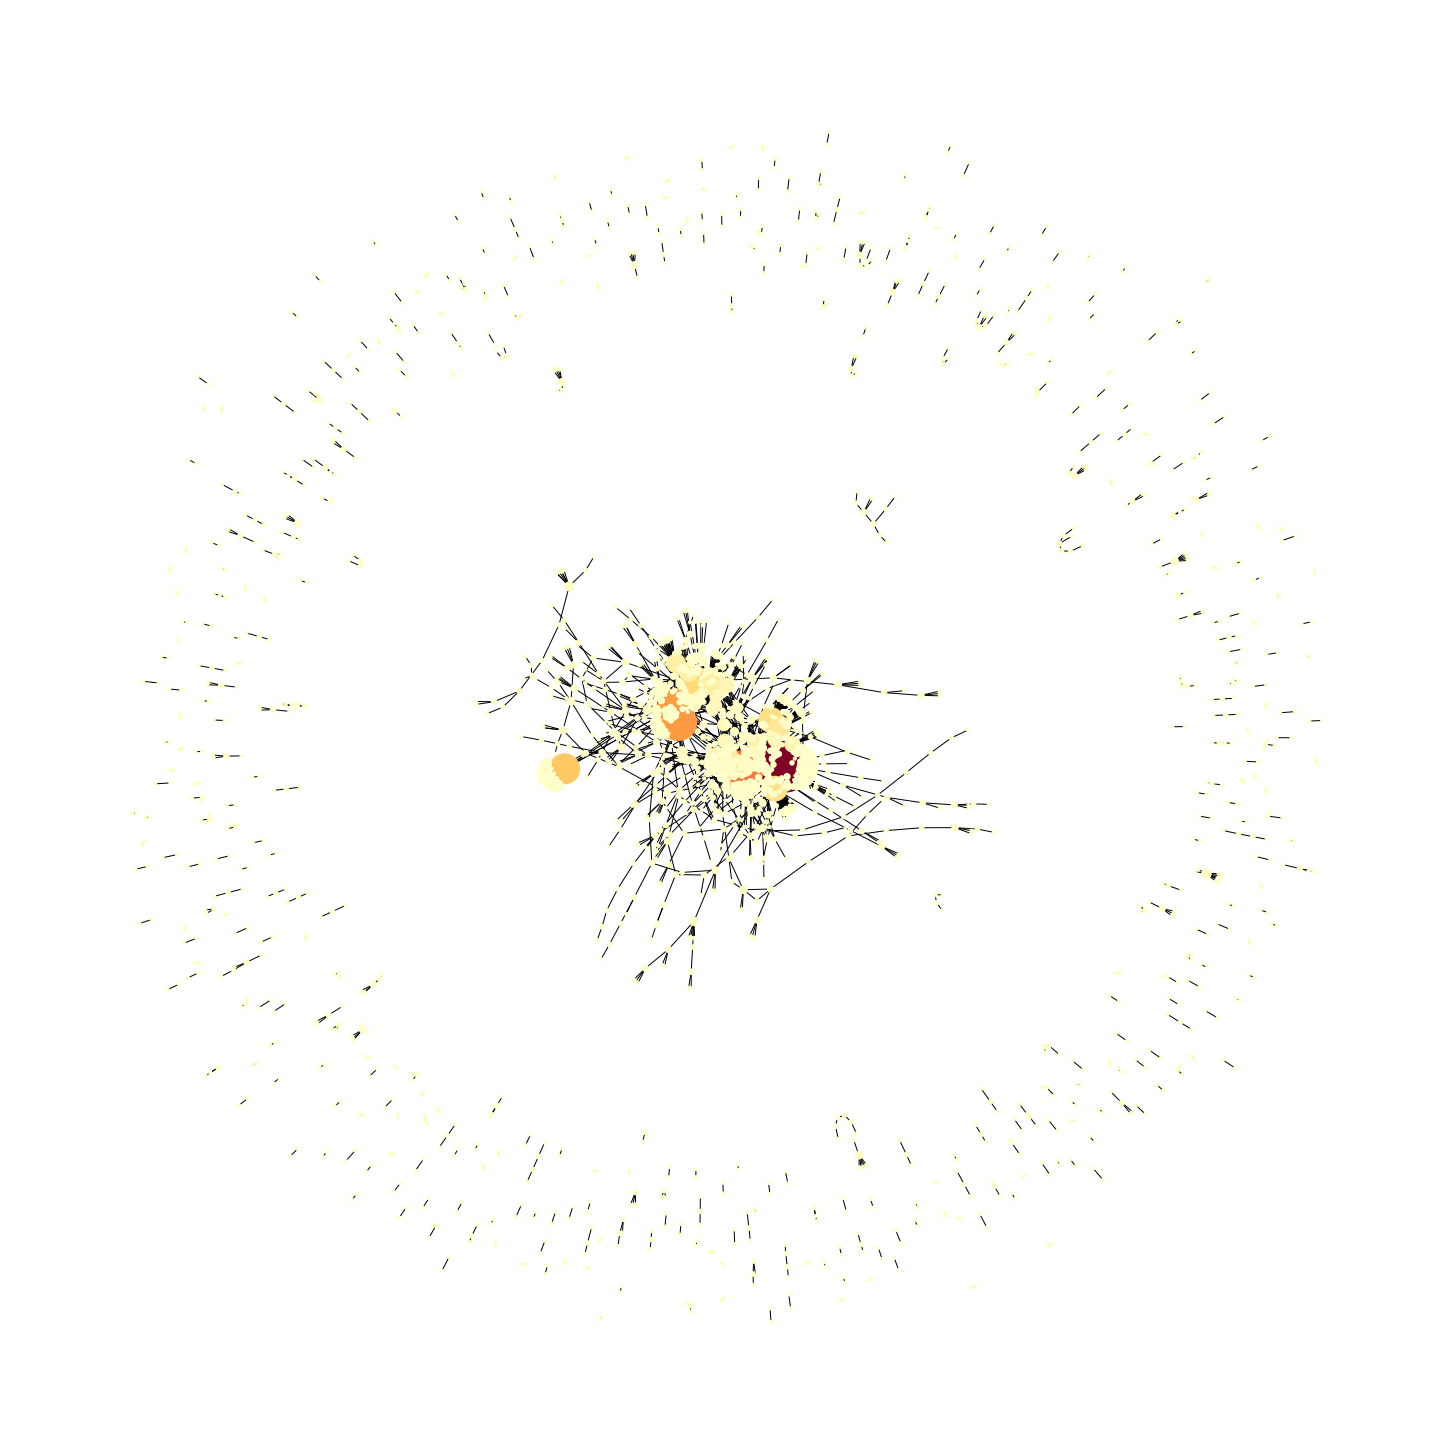

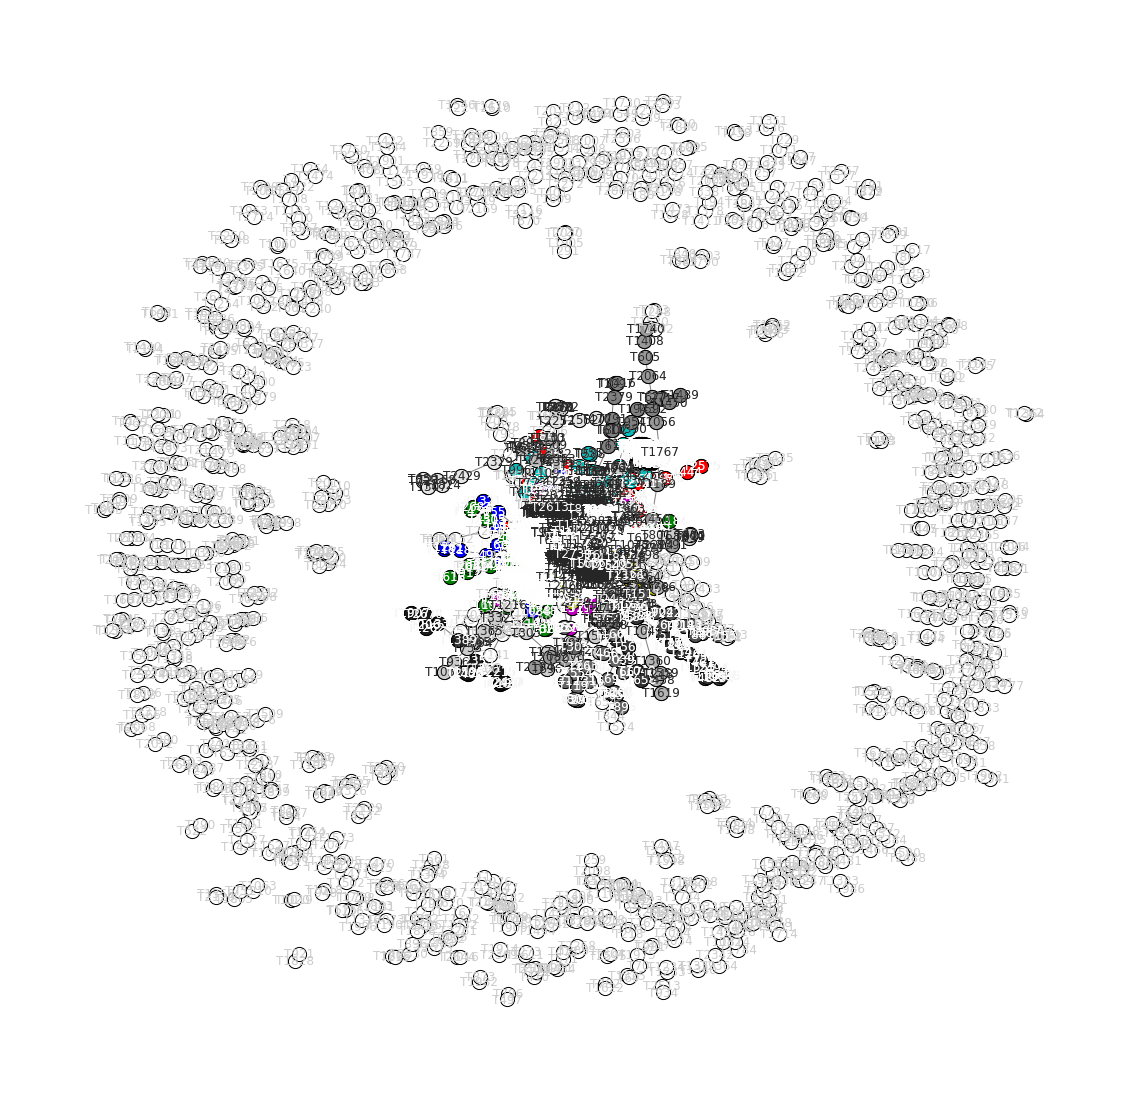

In [ ]:
from cdlib import viz
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
pos_G_C = nx.spring_layout(G_C)
grados_G_C = [G_C.degree(u) for u in G_C.nodes()]
d_c = dict(G_C.degree)

nx.draw(G_C, nodelist=d_c.keys(),cmap='YlOrRd',node_color=grados_G_C,node_size=[v * 10 for v in d_c.values()])
viz.plot_network_clusters(G_C,louvain_coms_G_C,pos_G_C,figsize=(20,20),plot_labels=True)  #plotear las comunidades de Criminal Networks S1 con Louvain
plt.show()

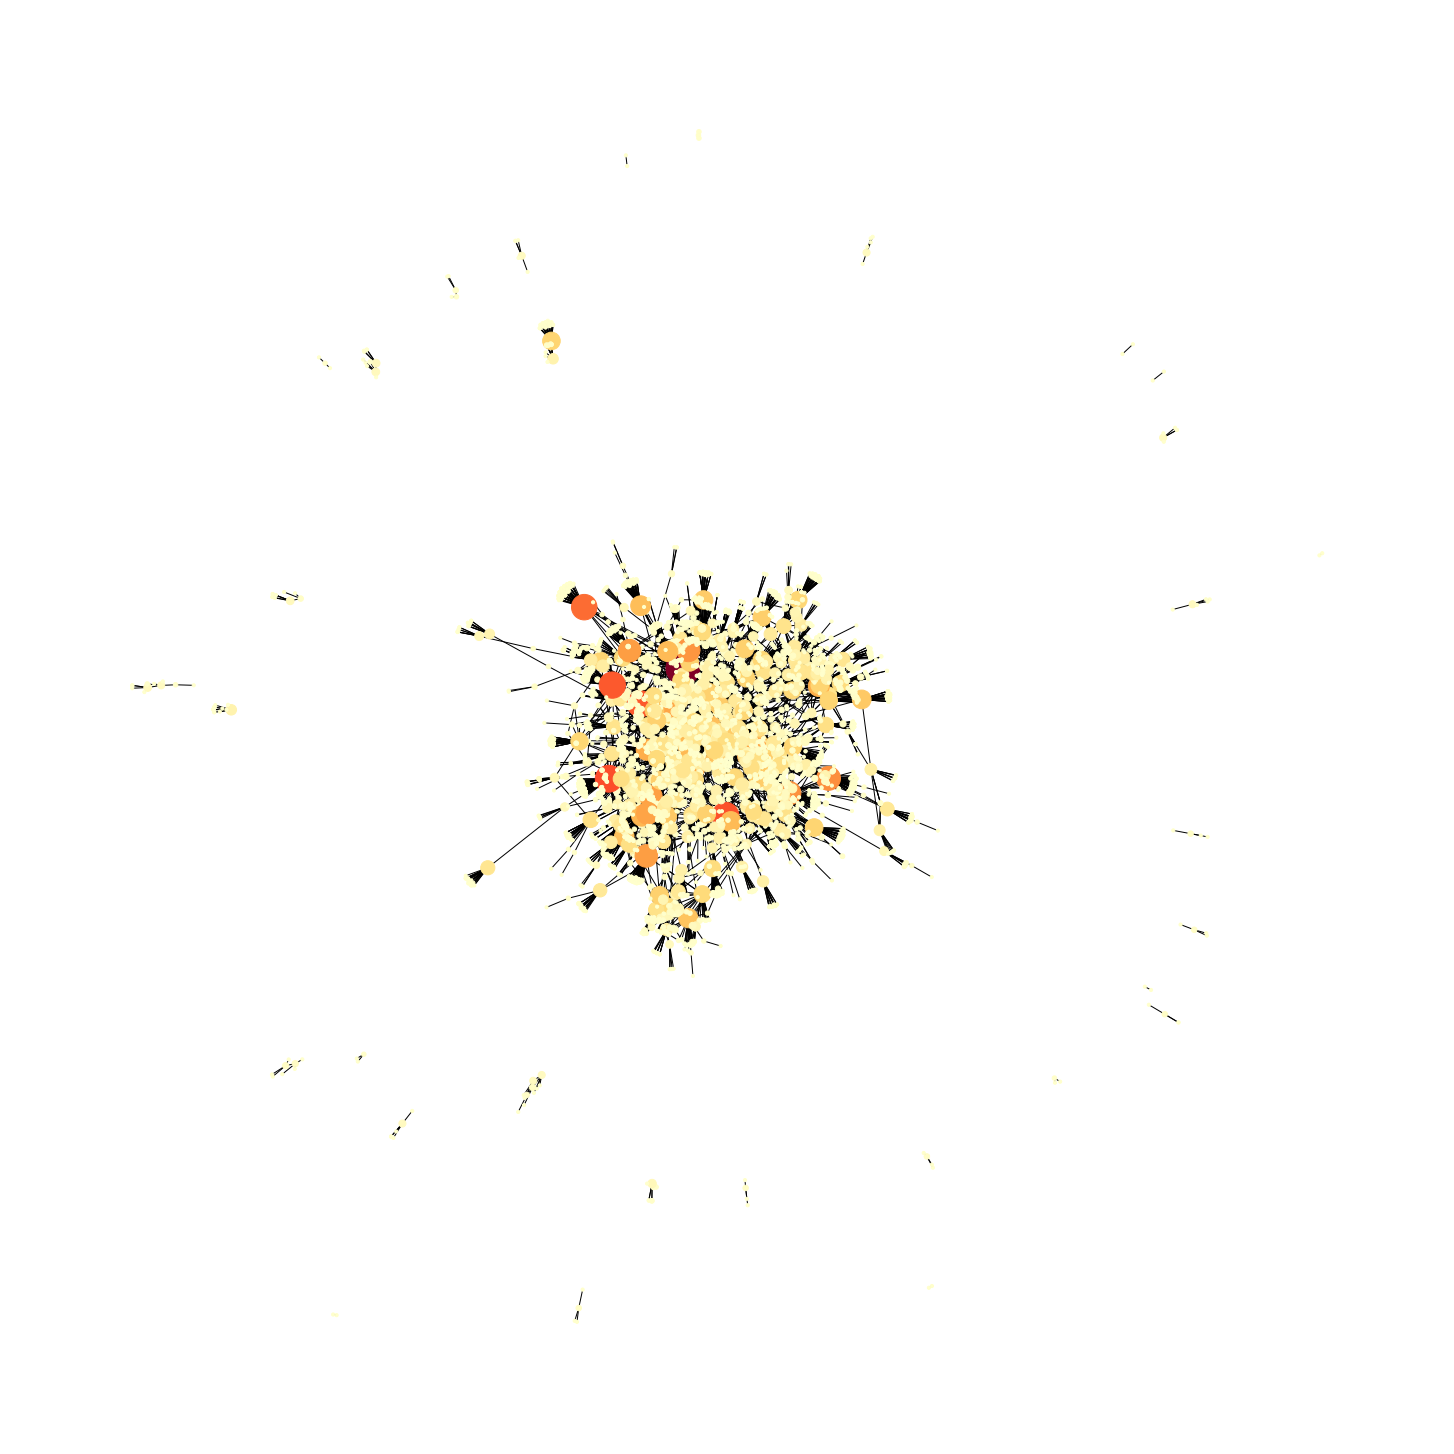

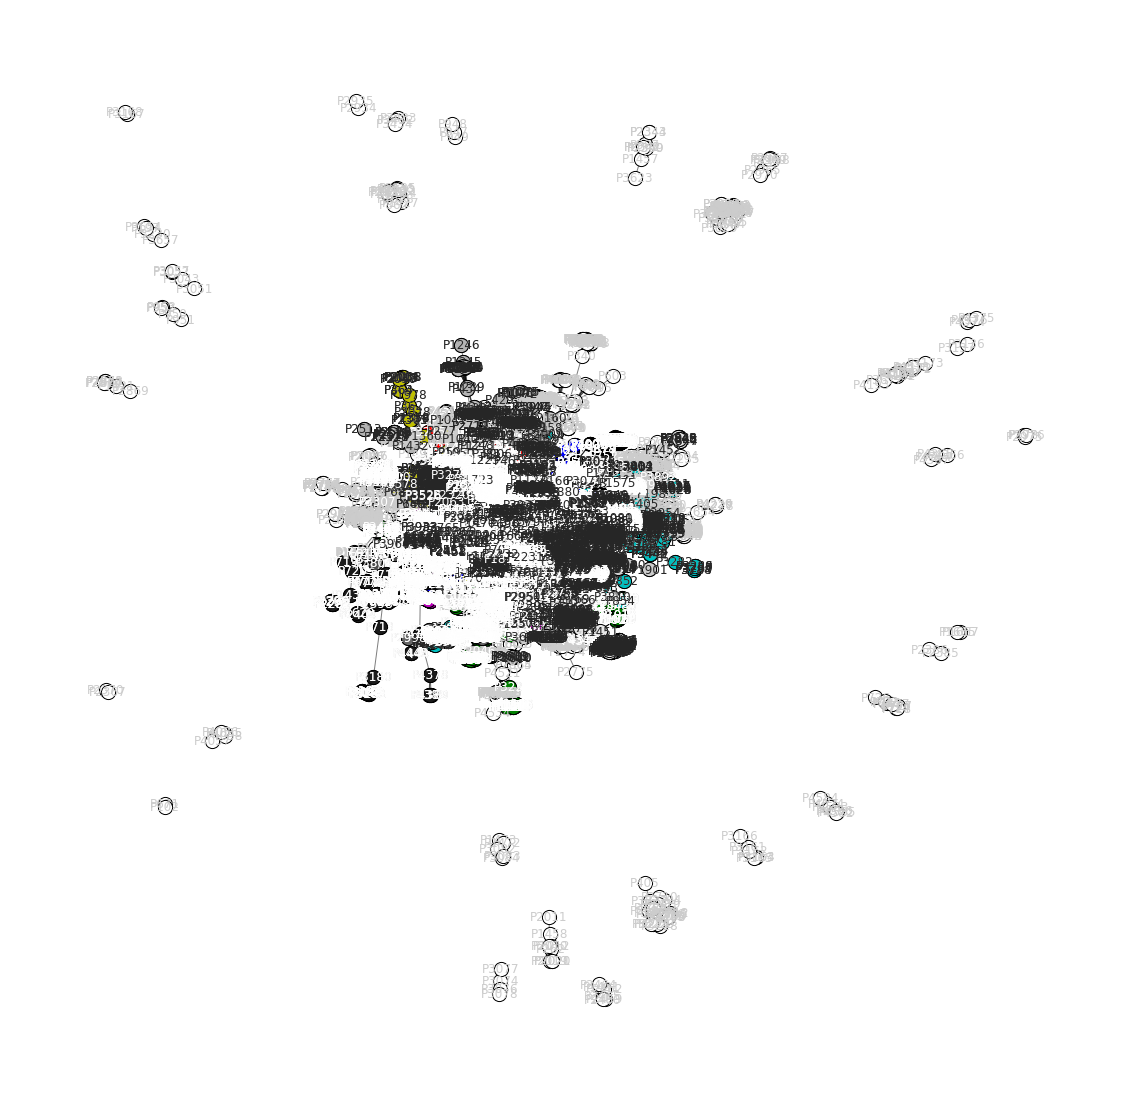

In [ ]:
plt.figure(figsize=(20,20))
pos_G_T = nx.spring_layout(G_T)
grados_G_T = [G_T.degree(u) for u in G_T.nodes()]
d_c = dict(G_T.degree)

nx.draw(G_T, nodelist=d_c.keys(),cmap='YlOrRd',node_color=grados_G_T,node_size=[v * 10 for v in d_c.values()])
viz.plot_network_clusters(G_T,louvain_coms_G_T,pos_G_T,figsize=(20,20),plot_labels=True)  #plotear las comunidades de Terrorist Network S1 con Louvain
plt.show()

Such strategy is feasible when the network is small enogh. In case of medium size graphs an alternative is collapsing all community nodes into a single met-node and visualize the resulting community graph:

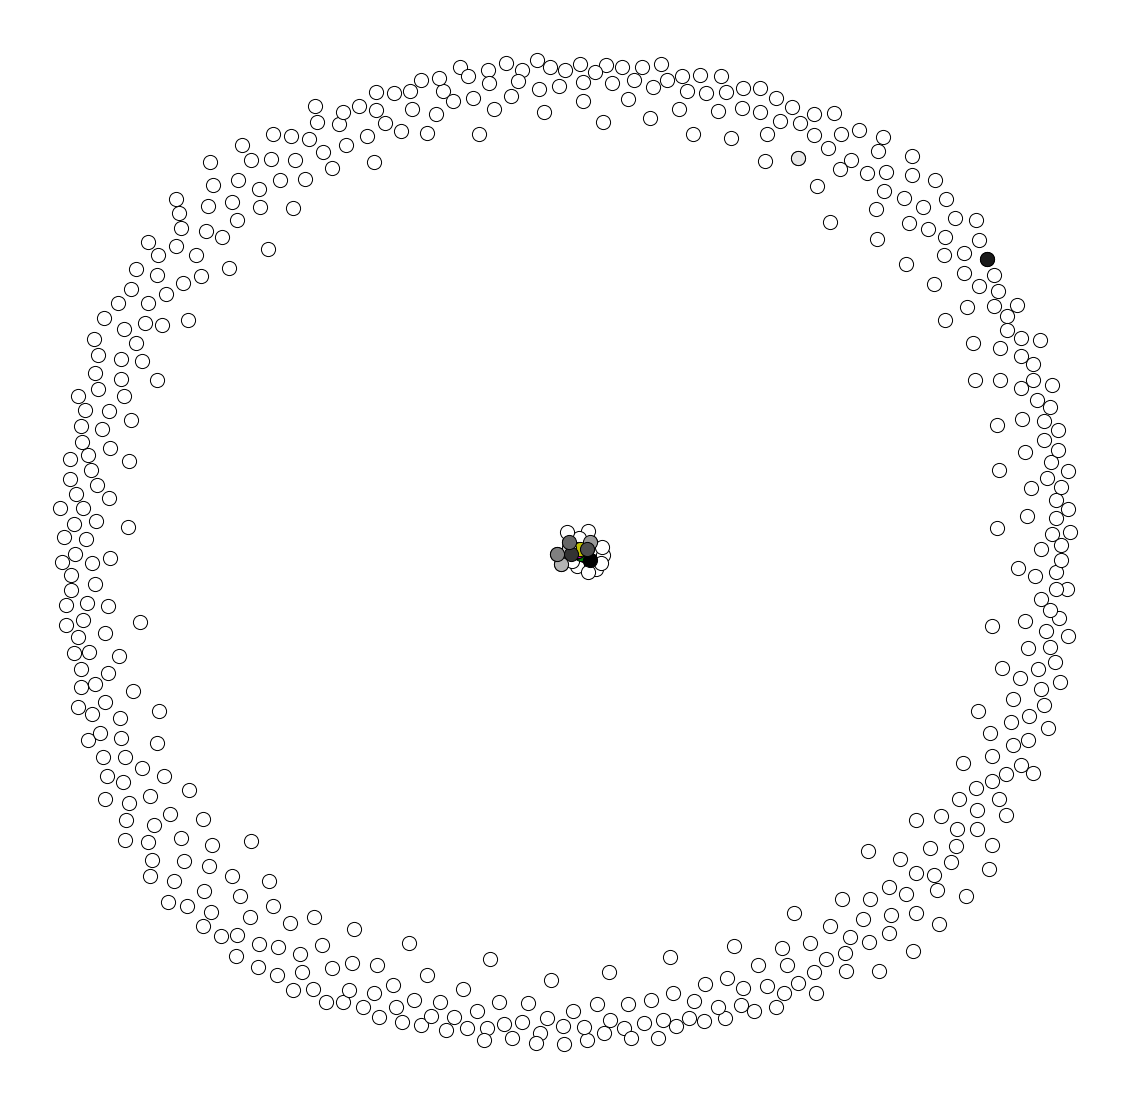

In [ ]:
viz.plot_community_graph(G_C,louvain_coms_G_C,figsize=(20,20)) #plotear el grafo de comunidades
plt.show()

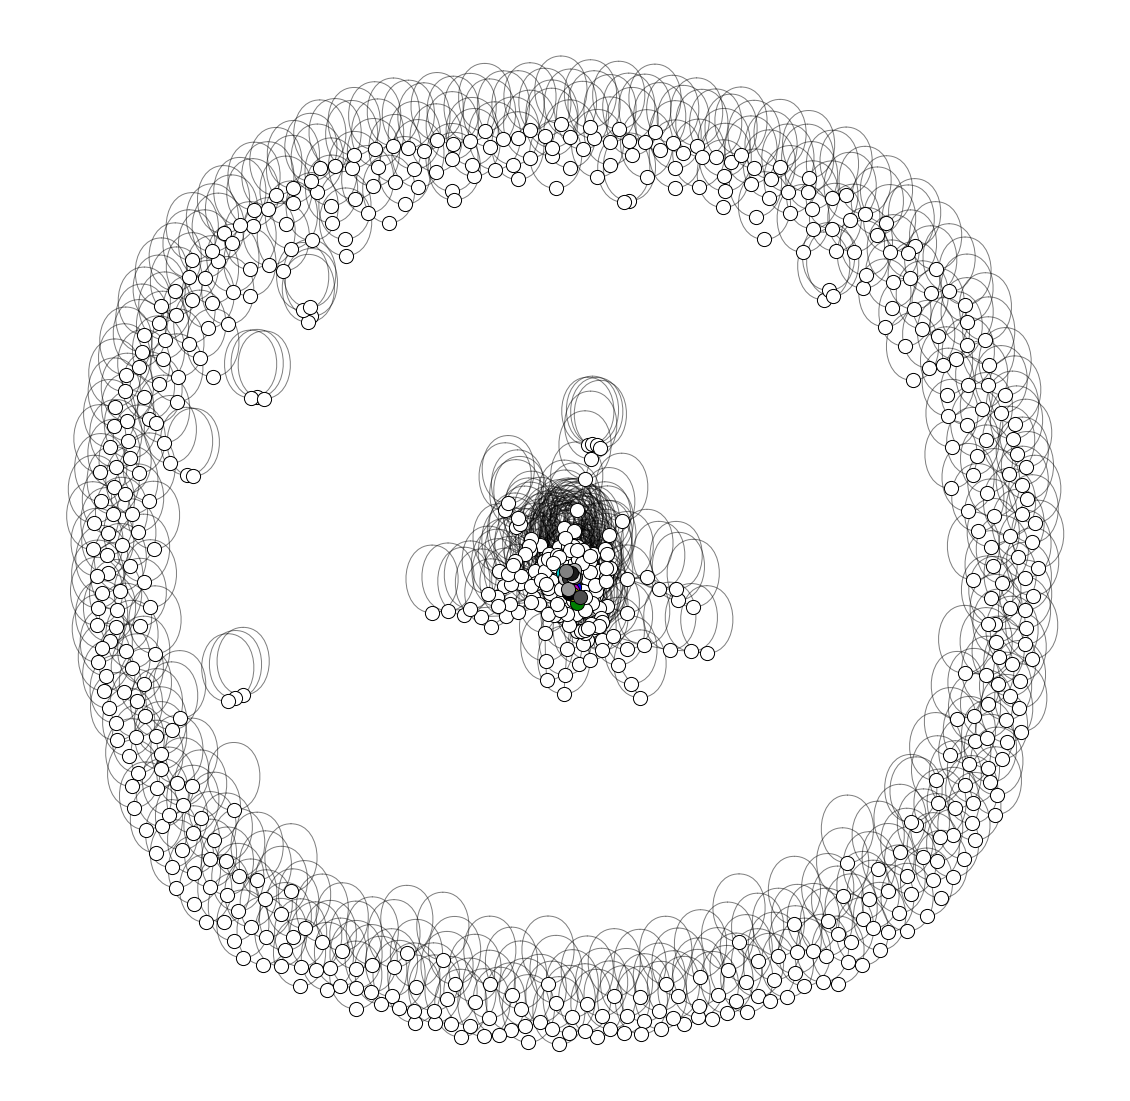

In [ ]:
viz.plot_community_graph(G_C,lp_coms_G_C,figsize=(20,20))
plt.show()

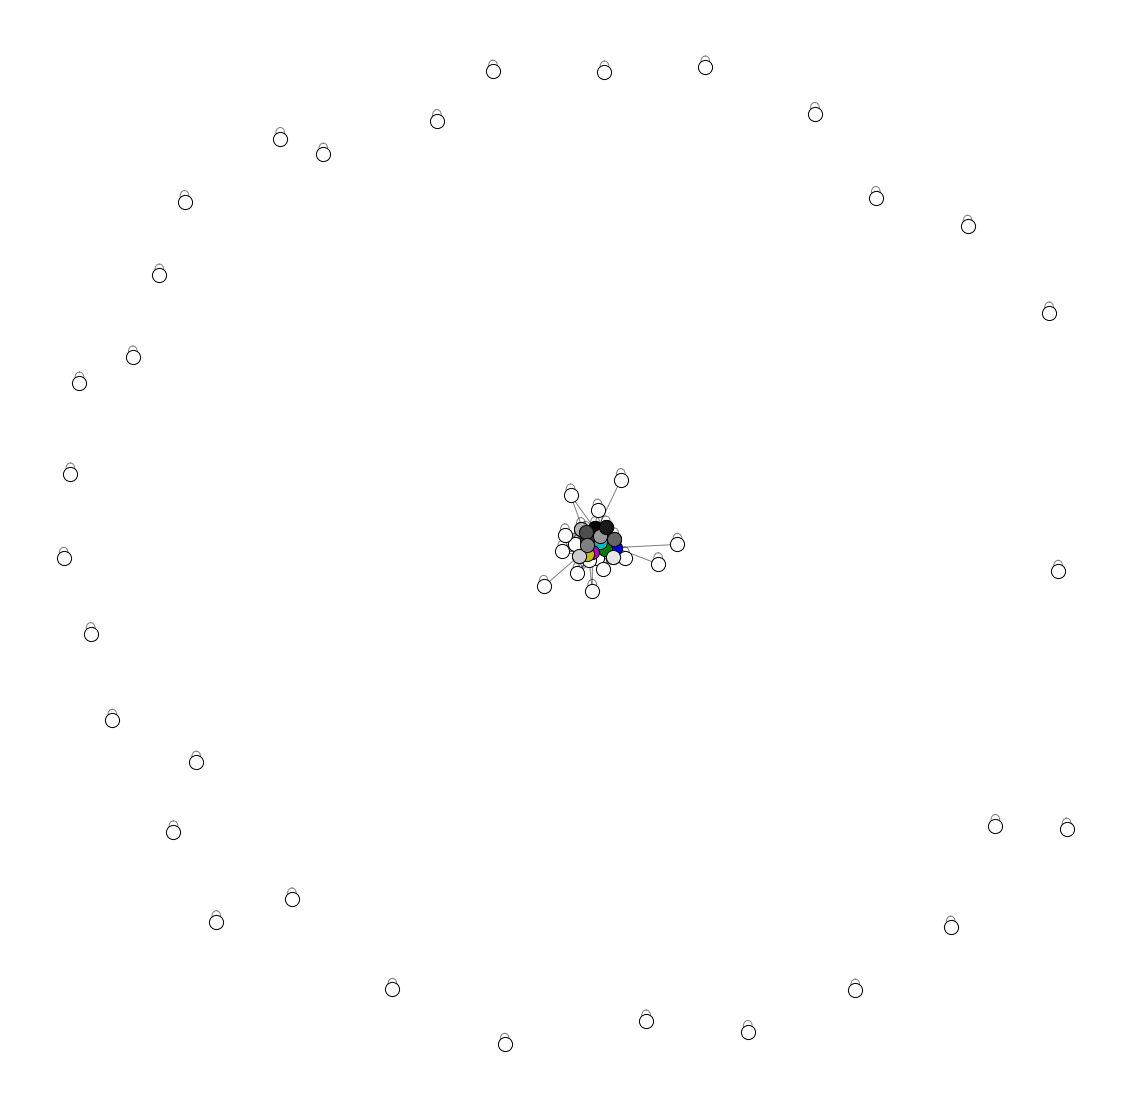

In [ ]:
viz.plot_community_graph(G_T,louvain_coms_G_T,figsize=(20,20)) #plotear el grafo de comunidades
plt.show()

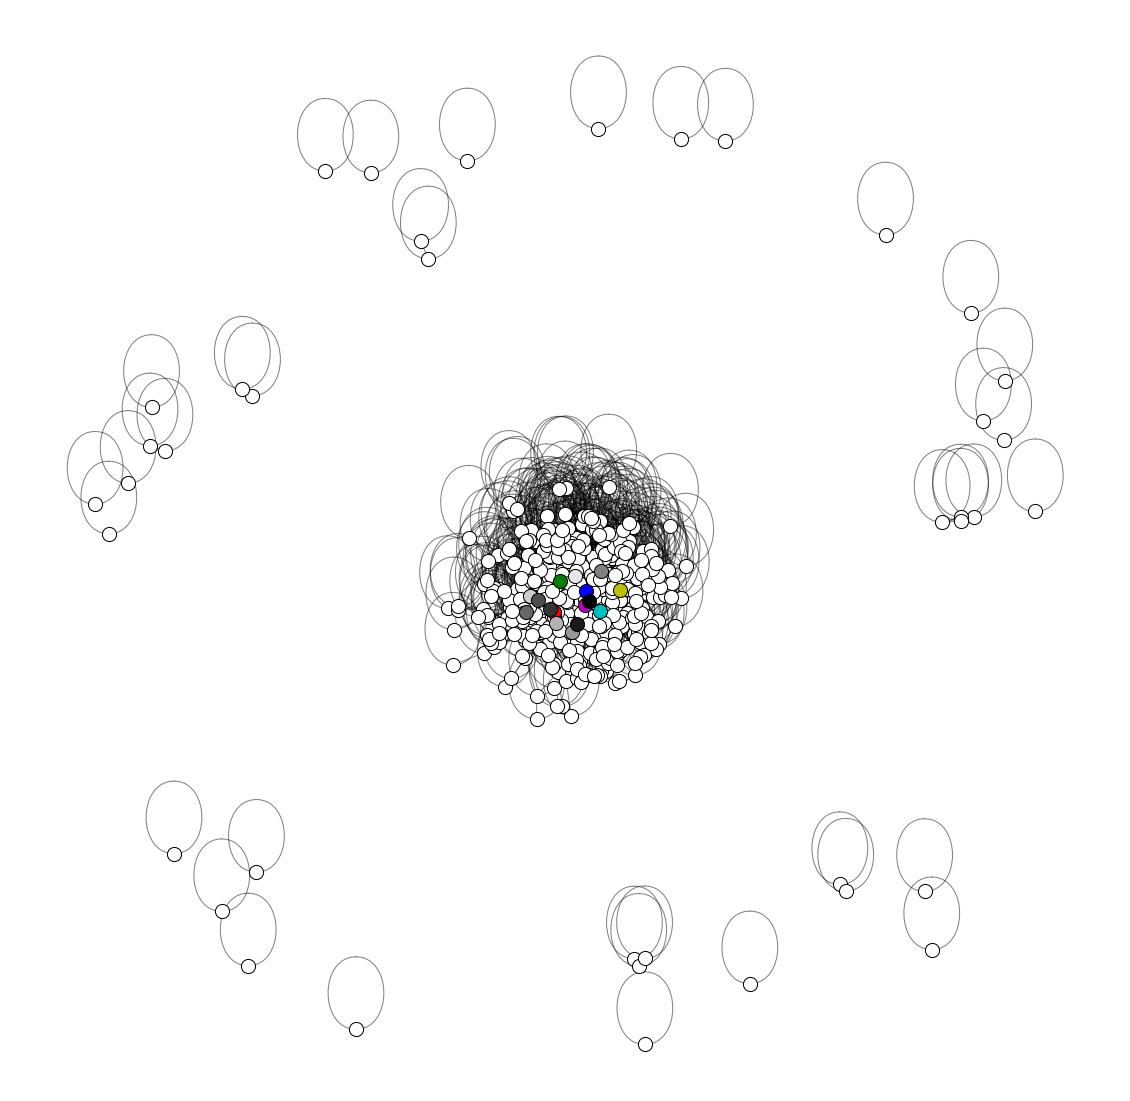

In [ ]:
viz.plot_community_graph(G_T,lp_coms_G_T,figsize=(20,20))
plt.show()

In [ ]:
nx.write_graphml(G_C,'Criminal.graphml')
nx.write_graphml(G_T,'Terrorist.graphml')

In [ ]:
print('Criminal Network',louvain_coms_G_C.communities) #para obtener las comunidades calculadoas por Louvain
print('Terrorist Network',louvain_coms_G_T.communities)

Criminal Network [['T1955', 'T679', 'T1482', 'T23', 'T1882', 'T2460', 'T37', 'T1036', 'T1079', 'T1242', 'T1363', 'T44', 'T1499', 'T1789', 'T1814', 'T1992', 'T2010', 'T2109', 'T2226', 'T2273', 'T2324', 'T1878', 'T2458', 'T1862', 'T89', 'T1156', 'T2327', 'T2333', 'T2339', 'T2390', 'T2414', 'T2434', 'T2439', 'T2517', 'T2577', 'T2579', 'T2607', 'T55', 'T56', 'T1589', 'T1849', 'T1743', 'T184', 'T236', 'T990', 'T1864', 'T355', 'T1448', 'T444', 'T2575', 'T543', 'T570', 'T1984', 'T572', 'T641', 'T678', 'T2319', 'T734', 'T783', 'T789', 'T966', 'T1062', 'T1140', 'T43', 'T1287', 'T1331', 'T1330', 'T2621', 'T1465', 'T2069', 'T1566', 'T1601', 'T1662', 'T1681', 'T2740', 'T2724', 'T2582', 'T1911', 'T1853', 'T1942', 'T1946', 'T1961', 'T2217', 'T2004', 'T2013', 'T2741', 'T2315', 'T2343', 'T2363', 'T2404', 'T2466', 'T2477', 'T2598', 'T2568', 'T2576', 'T2580', 'T1217', 'T2587', 'T2040', 'T2672', 'T2713', 'T2701', 'T2702', 'T2703', 'T2691', 'T2019', 'T970', 'T1430', 'T1971', 'T2', 'T1684', 'T1011', 'T1484

In [ ]:
print('Criminal Network',louvain_coms_G_C.overlap) #para saber si hay interseccion entre las comunidades o no
print('Terrorist Network',louvain_coms_G_T.overlap)

Criminal Network False
Terrorist Network False


In [ ]:
print('Criminal Network',louvain_coms_G_C.node_coverage) #el porcentaje de nodos cubiertos por el resultado de la deteccion
print('Terrorist Network',louvain_coms_G_T.node_coverage)

Criminal Network 1.0
Terrorist Network 1.0


#Cetrality Analysis Code Section

In [ ]:
#posiciones para los nodos
pos_G_C = nx.spring_layout(G_C)
pos_G_T = nx.spring_layout(G_T)

In [ ]:
#función para plotear la red
def draw_net(G, pos, measures, measure_name):
  plt.figure(figsize=(20,20))
  nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,
                                 node_color=list(measures.values()),
                                 nodelist=measures.keys())
  labels = nx.draw_networkx_labels(G, pos)
  edges = nx.draw_networkx_edges(G, pos, alpha=.2)
  plt.title(measure_name)
  plt.colorbar(nodes)
  plt.axis('off')
  plt.show()

## Centrality measures

We can measure nodes importance using so-called centrality.

**Bad term:**
- nothing to do with being central in general

**Usage:**
- Some centralities have straightforward interpretation
- Centralities can be used as node features for machine learning on graph


Node centrality measures can be easily computed in python using ``networkx`` as follows

### Degree Centrality

How many neighbors does a node have?

In [ ]:
degrees_G_C = dict(G_C.degree()) #calcular los grados como un diccionario para la Criminal Netowork
degrees_G_T = dict(G_T.degree()) #caluclar los grados como un diccionarion para la Terrorist Network

In [ ]:
ranks_G_C = [ (k,v) for k,v in sorted(degrees_G_C.items(), key=lambda item: -item[1] )]
print(ranks_G_C[:10]) # top 5 segun grado
ranks_G_T = [ (k,v) for k,v in sorted(degrees_G_T.items(), key=lambda item: -item[1] )]
print(ranks_G_T[:10]) # top 5 segun grado

[('T1125', 292), ('T1126', 161), ('T1424', 134), ('T1370', 131), ('T1673', 90), ('T1862', 72), ('T2306', 62), ('T2448', 61), ('T1703', 51), ('T2458', 46)]
[('P339', 114), ('P710', 72), ('P2302', 71), ('P633', 69), ('P2479', 69), ('P1451', 65), ('P380', 57), ('P410', 56), ('P750', 54), ('P91', 51)]


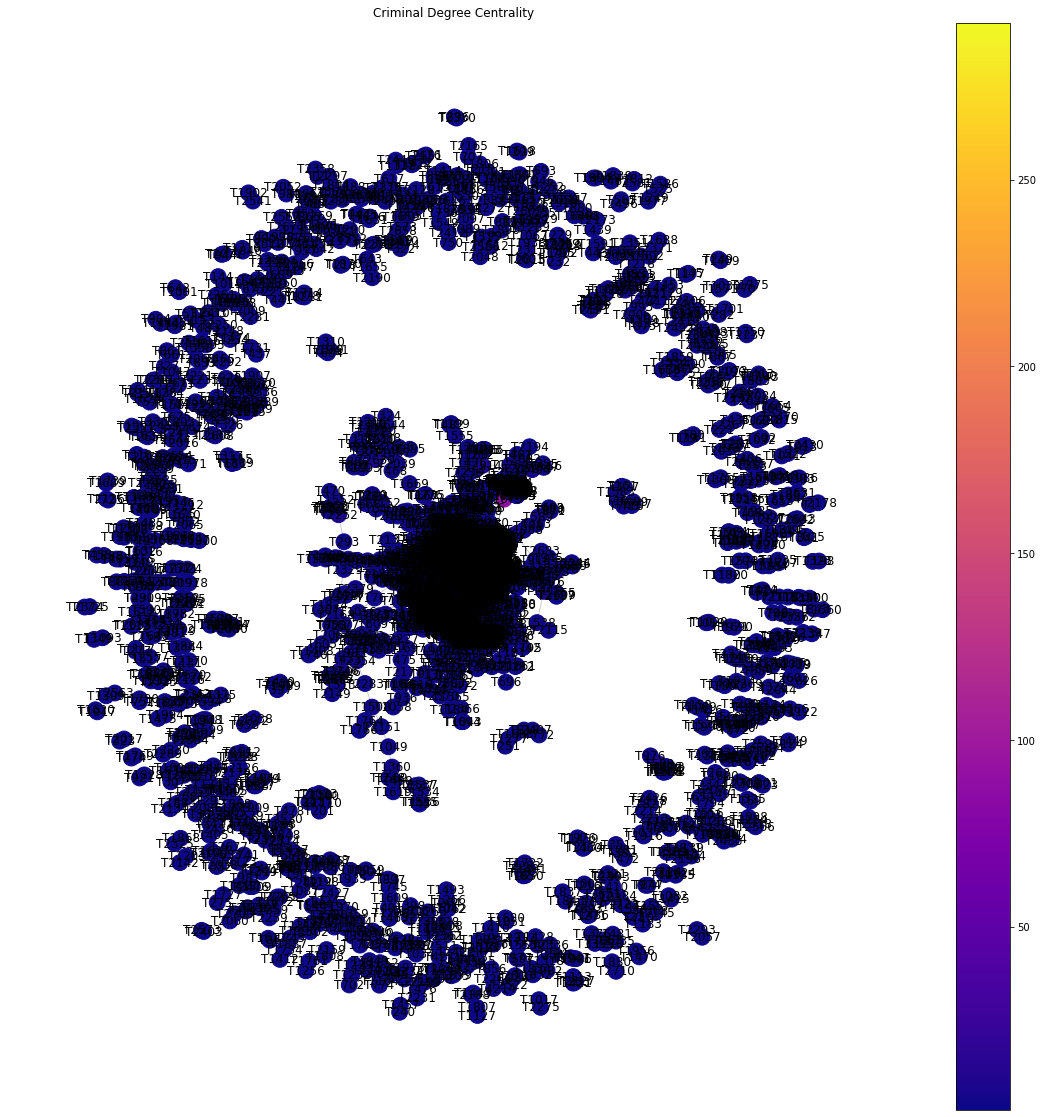

In [ ]:
draw_net(G_C,pos_G_C,degrees_G_C,'Criminal Degree Centrality')

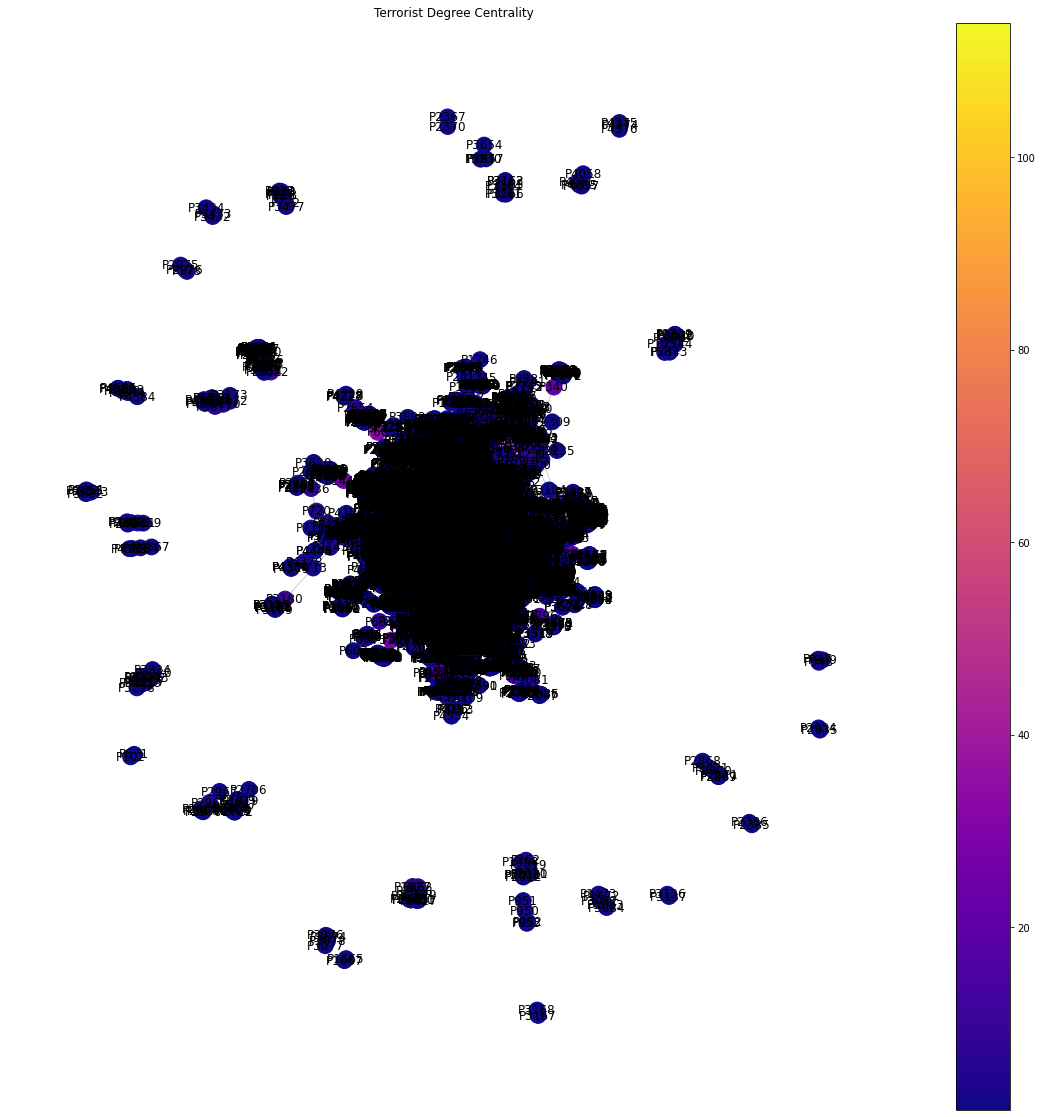

In [ ]:
draw_net(G_T,pos_G_T,degrees_G_T,'Terrorist Degree Centrality')

### Closeness Centrality

**Farness:** average of length of shortest paths to all other nodes

**Closeness:** inverse of the Farness  (normalized by number of nodes)

In [ ]:
closeness_G_C = nx.closeness_centrality(G_C) #calcular la centralidad de cercania de todos los nodos para la Criminal Network
closeness_G_T = nx.closeness_centrality(G_T) #calcular la centralidad de cercania de todos los nodos para la Terrorist  Network

In [ ]:
ranks_G_C = [ (k,v) for k,v in sorted(closeness_G_C.items(), key=lambda item: -item[1] )]
print(ranks_G_C[:10]) # top 10 segun grado de la Criminal Network
ranks_G_T = [ (k,v) for k,v in sorted(closeness_G_T.items(), key=lambda item: -item[1] )]
print(ranks_G_T[:10]) # top 10 segun grado de la Terrorist Network

[('T1126', 0.19183819727809992), ('T1125', 0.18665668918488026), ('T1424', 0.17816884948179193), ('T1370', 0.17379401040540735), ('T2739', 0.1734848295211123), ('T2202', 0.1730060620042001), ('T2306', 0.16943238466164232), ('T2737', 0.16894316699659426), ('T1939', 0.16778049178881801), ('T2458', 0.1673326506286572)]
[('P339', 0.25653736656687187), ('P312', 0.25046187152398786), ('P533', 0.2494851310711709), ('P696', 0.24831041105976426), ('P128', 0.24523637404733584), ('P338', 0.24492853952270474), ('P1843', 0.24186218904339976), ('P633', 0.2416674771002759), ('P4', 0.2379540500131253), ('P482', 0.23751956300762356)]


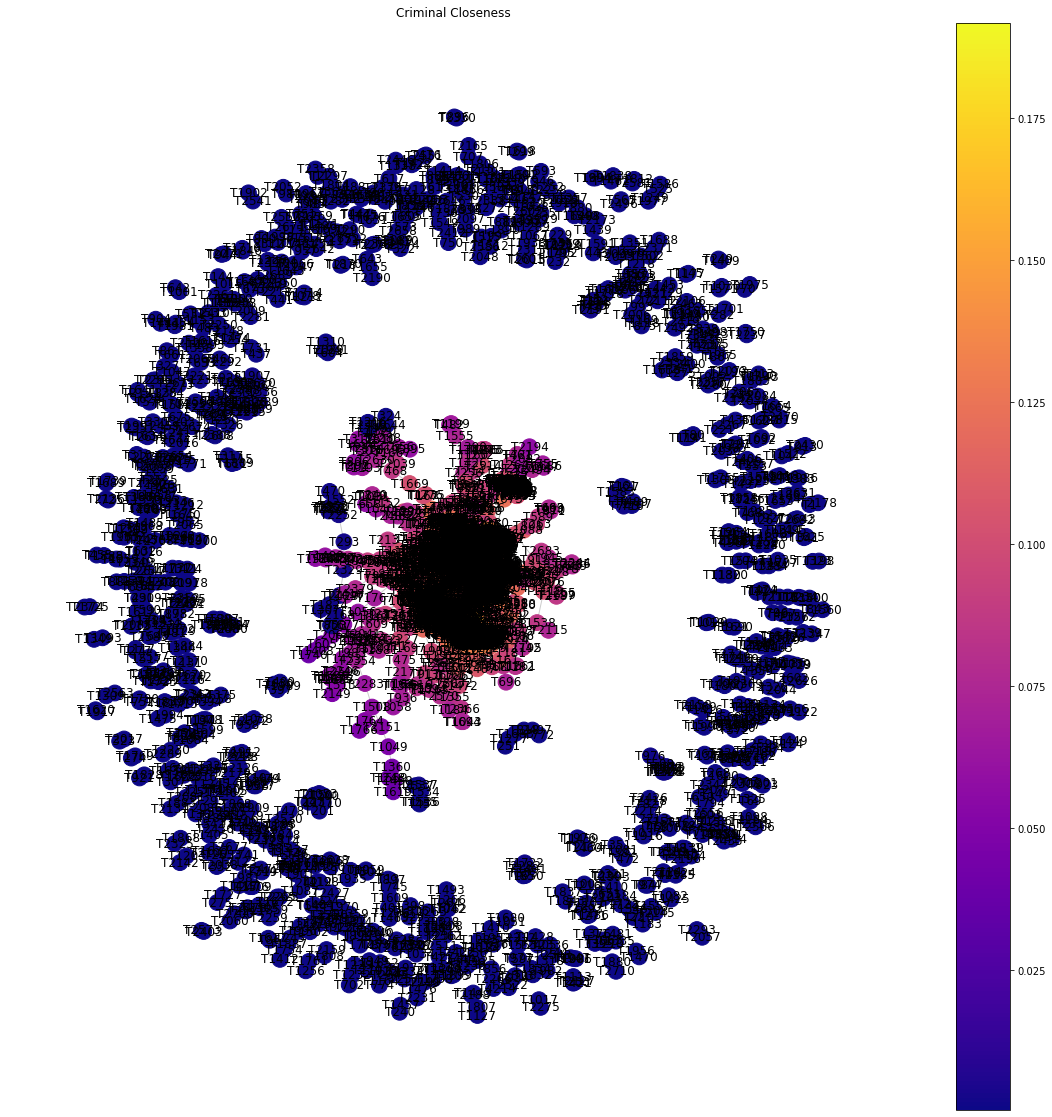

In [ ]:
draw_net(G_C,pos_G_C,closeness_G_C,'Criminal Closeness')

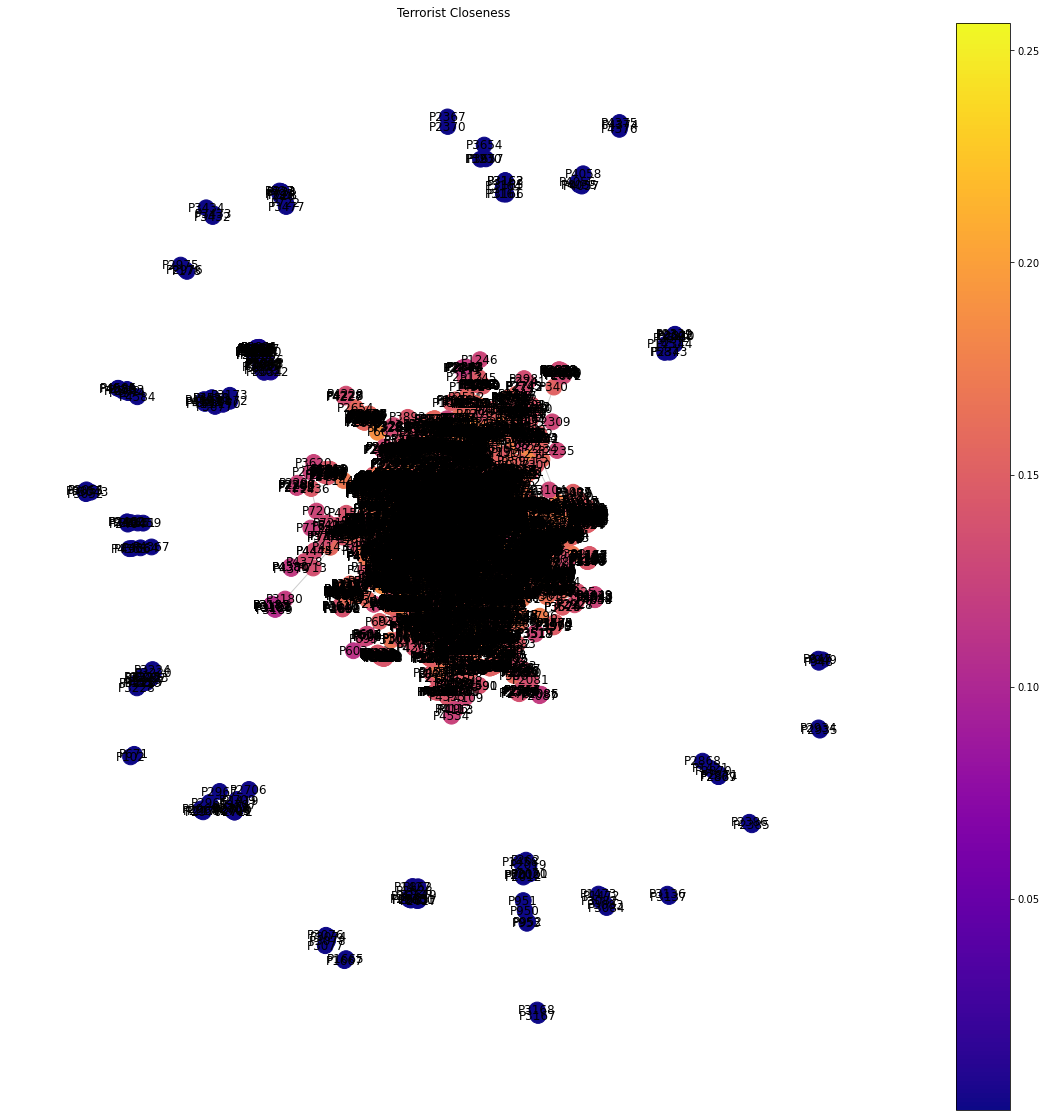

In [ ]:
draw_net(G_T,pos_G_T,closeness_G_T,'Terrorist Closeness')

Betweenness Centrality
Number of shortest paths that go through a node.

Assumption: important vertices are bridges over which information flows

Practically: if information spreads via shortest paths, important nodes are found on many shortest paths

In [ ]:
betweenness_G_C = nx.betweenness_centrality(G_C) # calcular la centralidad de intermedios de todos los nodos de la Criminal Network
betweenness_G_T = nx.betweenness_centrality(G_T) # calcular la centralidad de intermedios de todos los nodos de la Terrorist Network

In [ ]:
ranks_G_C = [ (k,v) for k,v in sorted(betweenness_G_C.items(), key=lambda item: -item[1] )]
print(ranks_G_C[:10]) # top 5 segun grado de la Criminal Network
ranks_G_T = [ (k,v) for k,v in sorted(betweenness_G_T.items(), key=lambda item: -item[1] )]
print(ranks_G_T[:10]) # top 5 segun grado de la Terrorist Network

[('T1125', 0.10961046026270778), ('T1126', 0.09223058364799946), ('T1370', 0.05550133359363109), ('T1424', 0.055290163687744774), ('T37', 0.04405206261876908), ('T1673', 0.034419363050371535), ('T2306', 0.030105764168785295), ('T2737', 0.02658188262723159), ('T1862', 0.023392824322243766), ('T2448', 0.019466072549385496)]
[('P339', 0.16377982690499734), ('P312', 0.10935733899584622), ('P533', 0.06932843248190176), ('P2302', 0.06296116403194729), ('P696', 0.05889409609561869), ('P750', 0.05758555357266653), ('P338', 0.05722010773738934), ('P759', 0.056658266854977886), ('P633', 0.05257053644934196), ('P482', 0.04992577177928239)]


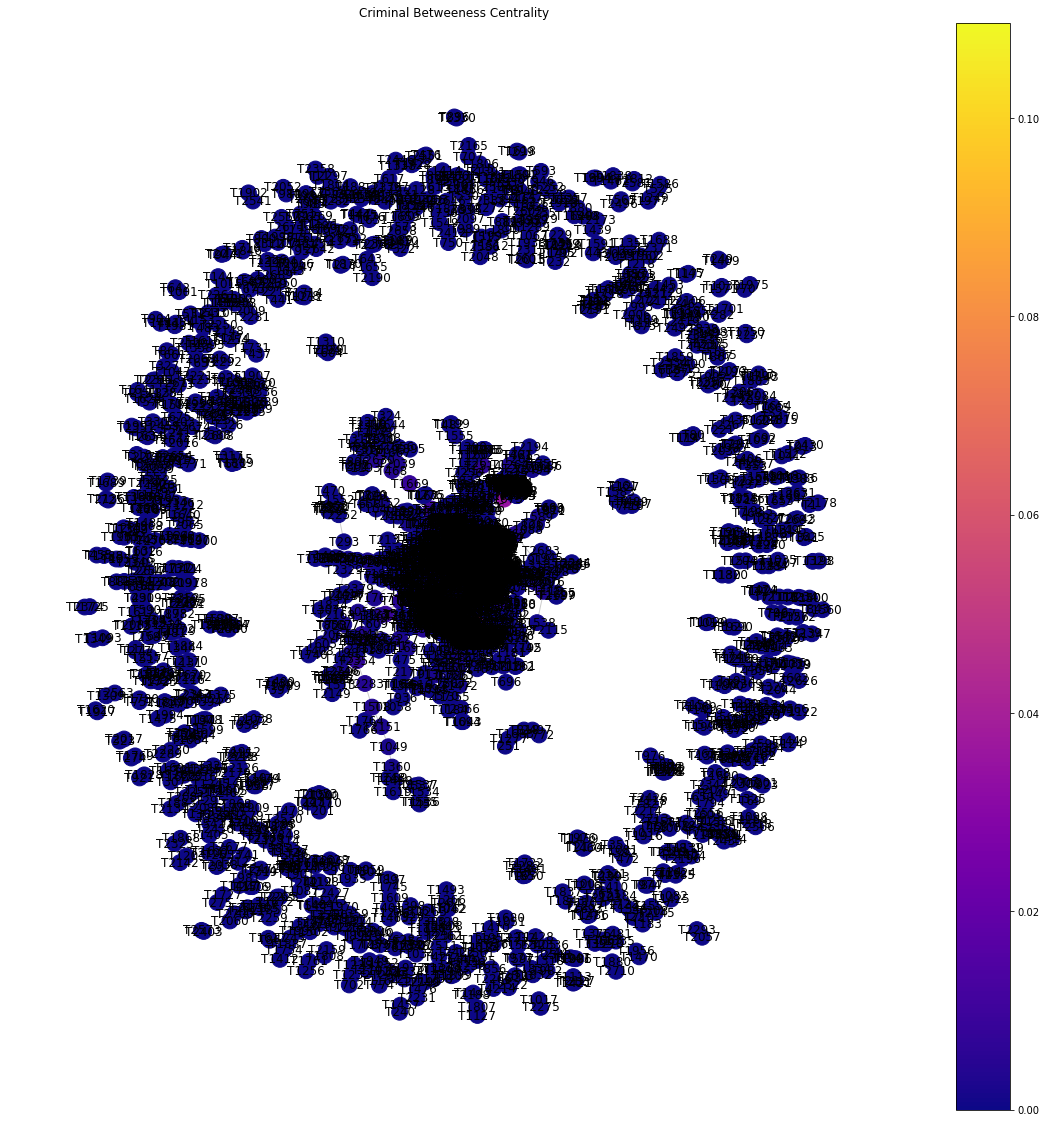

In [ ]:
draw_net(G_C,pos_G_C,betweenness_G_C,'Criminal Betweeness Centrality')

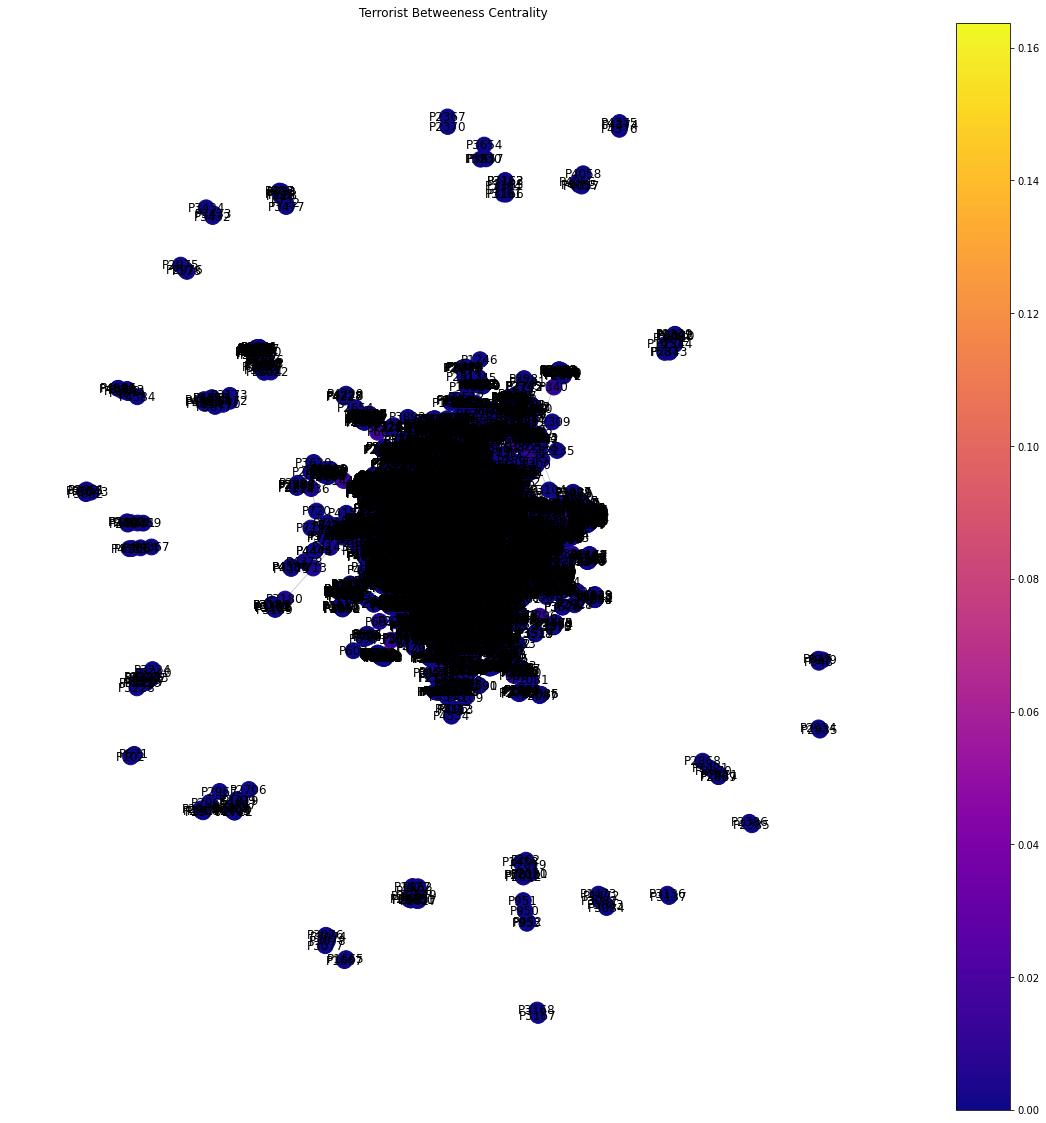

In [ ]:
draw_net(G_T,pos_G_T,betweenness_G_T,'Terrorist Betweeness Centrality')

In [ ]:
print('Global clustering:',nx.average_clustering(G_C))

Global clustering: 0.06934859419095916


Calculando Probabilidad de aristas para randomgraph

n = 2749

M = 2952

M = p(n(n-1)/2)

image.png

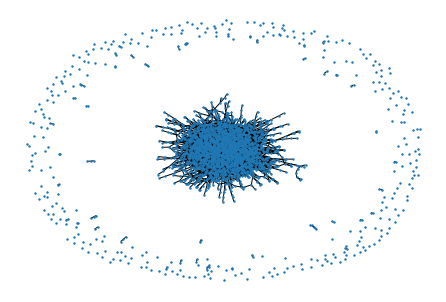

In [ ]:
#Criminal random graph
er_c = nx.erdos_renyi_graph(2749, 0.00078)
nx.draw(er_c, node_size=2)

In [ ]:
seq = [d[1] for d in G_C.degree()]
print(seq)

cm = nx.configuration_model(seq)

[5, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 3, 2, 5, 5, 1, 3, 1, 2, 292, 161, 2, 2, 4, 62, 1, 41, 40, 4, 9, 2, 2, 61, 1, 8, 1, 51, 2, 3, 4, 5, 3, 2, 4, 12, 43, 3, 1, 1, 3, 2, 6, 1, 131, 1, 19, 1, 15, 3, 1, 3, 3, 1, 6, 31, 1, 1, 3, 2, 1, 2, 6, 3, 2, 3, 2, 13, 4, 1, 9, 4, 2, 1, 1, 2, 2, 1, 4, 1, 2, 45, 2, 1, 11, 2, 40, 4, 3, 9, 1, 3, 4, 2, 4, 1, 1, 5, 1, 2, 5, 3, 1, 5, 7, 1, 2, 1, 2, 3, 1, 2, 6, 2, 24, 1, 4, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 4, 1, 2, 7, 6, 3, 4, 45, 3, 4, 1, 2, 2, 4, 11, 1, 1, 1, 1, 1, 2, 2, 2, 12, 7, 2, 5, 1, 1, 1, 2, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 5, 4, 1, 10, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 2, 1, 1, 7, 1, 8, 1, 1, 6, 3, 1, 1, 1, 2, 4, 8, 6, 5, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 7, 4, 2, 3, 1, 1, 1, 1, 1, 2, 5, 2, 1, 1, 2, 3, 38, 46, 72, 1, 1, 2, 1, 2, 6, 2, 1, 1, 1, 4, 1, 1, 12, 3, 2, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 1, 2, 4, 3, 2, 2, 7, 14, 4, 1, 3, 1, 3, 1, 1, 1, 1, 1, 2, 1, 

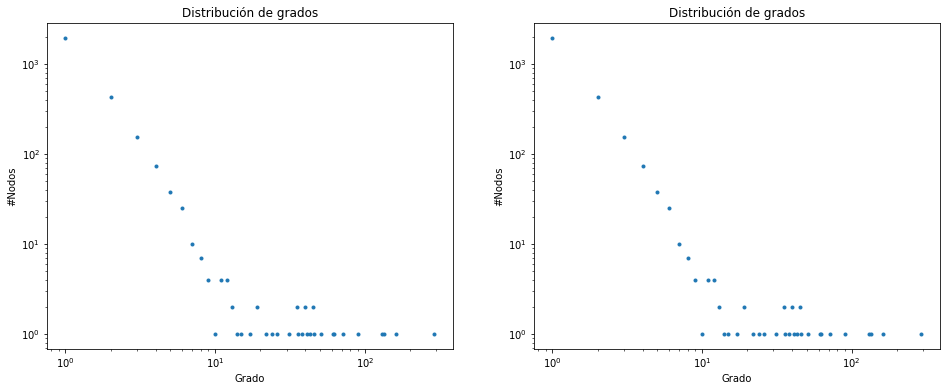

In [ ]:
hist_o = nx.degree_histogram(G_C)
hist = nx.degree_histogram(cm)

fig = plt.figure(figsize=(16,6))
#plot para el grafo original
plt.subplot(1,2,1) #1 fila 2 columnas 1er plot
plt.plot(range(len(hist_o)), hist_o, '.')
plt.title('Distribución de grados')
plt.xlabel('Grado')
plt.ylabel('#Nodos')
plt.loglog()

#plot para el grafo cm que simula el original
plt.subplot(1,2,2) #1 fila 2 columnas 2do plot
plt.plot(range(len(hist)), hist, '.')
plt.title('Distribución de grados')
plt.xlabel('Grado')
plt.ylabel('#Nodos')
plt.loglog()

plt.show()

Graph with 4275 nodes and 6531 edges

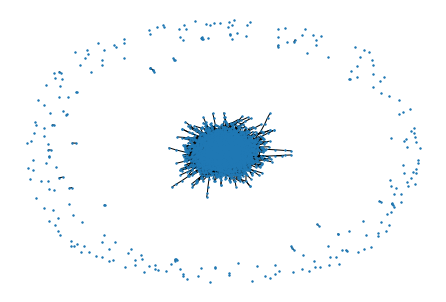

In [ ]:
#Terrorist random graph
er_t = nx.erdos_renyi_graph(4275, 0.0007)
nx.draw(er_t, node_size=2)